#Arboles de desición (load_iris)



## 1.Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt    #generar graficos
from sklearn.model_selection import train_test_split  #separar los datos (train y test)
from sklearn.tree import DecisionTreeClassifier       #clase que arboles de desición
from sklearn.datasets import load_iris        

## 2.Cargando datos (dataset)

In [2]:
db_iris =load_iris()

## 3.Explorando /conociendo los datos

In [ ]:
#visualizando la descripción
print(db_iris.DESCR)
#visualizar target (caracteristica más importante)
print(db_iris.target)

## 4.convertir dataset en un dataframe (pandas)

In [9]:
df_iris= pd.DataFrame(db_iris.data, columns=db_iris.feature_names)
df_iris['target']=db_iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 5.Dividiendo datos (split) train vs test

In [11]:
# split (75%- train , 25%-test),test_size=0.4 (60%-train, 40%-test)
X_train, X_test, Y_train, Y_test = train_test_split(df_iris[db_iris.feature_names],df_iris['target'], random_state=2)

## 6.Instanciar un árbol de desición

In [29]:
arbol = DecisionTreeClassifier(max_depth=3, random_state=0)

## 7.entrenar modelo (con algoritmo de árbol de clasificación)

In [30]:
arbol.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## 8.Usar datos de test(25%) para probar el modelo.

In [21]:
print(X_test.iloc[0:10])
print(Y_test.iloc[0:10])
#arbol.predict(X_test.iloc[0:10].values.reshape(1,-1))
arbol.predict(X_test.iloc[0:10])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
6                  4.6               3.4                1.4               0.3
3                  4.6               3.1                1.5               0.2
113                5.7               2.5                5.0               2.0
12                 4.8               3.0                1.4               0.1
24                 4.8               3.4                1.9               0.2
129                7.2               3.0                5.8               1.6
25                 5.0               3.0                1.6               0.2
108                6.7               2.5                5.8               1.8
128                6.4               2.8                5.6               2.1
45                 4.8               3.0                1.4               0.3
6      0
3      0
113    2
12     0
24     0
129    2
25     0
108    2
128    2
45     0
Name: target, dtype: int64


array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0])

## 9.calcular la presición del modelo (accuracy)

In [31]:
accuracy= arbol.score(X_test,Y_test)
print(accuracy)

0.9736842105263158


## 10.Graficando el arbol (imagen)

In [32]:
#0-setosa , 1-versicolor, 2-virginica
class_name_list= list(['setosa','versicolor','verginica'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol, feature_names=db_iris.feature_names, class_names=class_name_list)
grafico = graph_from_dot_data(dot_data)
grafico.write_png('arbol_iris.png')

True

## 11.Caracteristicas relevantes para el modelo

In [33]:
df_importancia = pd.DataFrame({'caracteristica':X_train.columns,'Importancia':arbol.feature_importances_})
df_importancia= df_importancia.sort_values('Importancia',ascending=False)
df_importancia.head()

,caracteristica,Importancia
3,petal width (cm),0.934803
2,petal length (cm),0.065197
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000


## 12. probar arbol con diferentes profundidades

In [27]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,6))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  arbol = DecisionTreeClassifier(max_depth=depth,random_state=0)
  arbol.fit(X_train,Y_train)
  score= arbol.score(X_test,Y_test)
  accuracy_list.append(score)

### Grafico de resultados

<function matplotlib.pyplot.show>

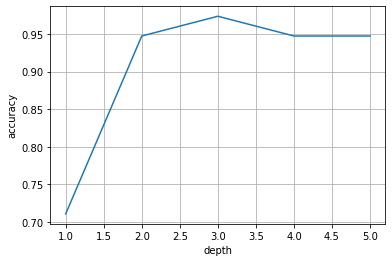

In [28]:
plt.plot (depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show